### Linear Data 

    Finding Outliers or Replacing Outliers using : Upper/Lower bound (2) , Z-score (2)

    1)Upper bound :  x.mean() + 3* x.std() , Lower bound : x.mean() - 3* x.std()

    2)Z-Score :   x-mean / std 
    It will convert all the values in range (3,-3) , any values which are lying outside this can be considered as outliers.


### Non-Linear Data 

    Finding Outliers or Replacing Outliers using : IQR  (2)

    1) IQR = 75percentile - 25percentile  
    2) Upper bound = 75percentile + 1.5 IQR  
    3) Lower bound = 25percentile - 1.5IQR

    Winsorization - 
    Explicitly we can define the Upperlimit and lowerlimit .
    Upper limit and lower limit diff should be same such as 99 / 1 , 98/2 ,97/3,96/4 .
    

## Techniques for Outlier Detection and Removal

    1. Z-Score Treatment
    2. IQR based filtering
    3. Percentile
    4. Winsorization Technique
 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv("D:/Sandesh/100-days-of-machine-learning/day42-outlier-removal-using-zscore/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
317,7.47,19.0,0
660,5.97,26.0,1
290,8.38,87.0,0
691,7.32,14.0,0
25,6.28,58.0,1


In [3]:
df.shape

(1000, 3)

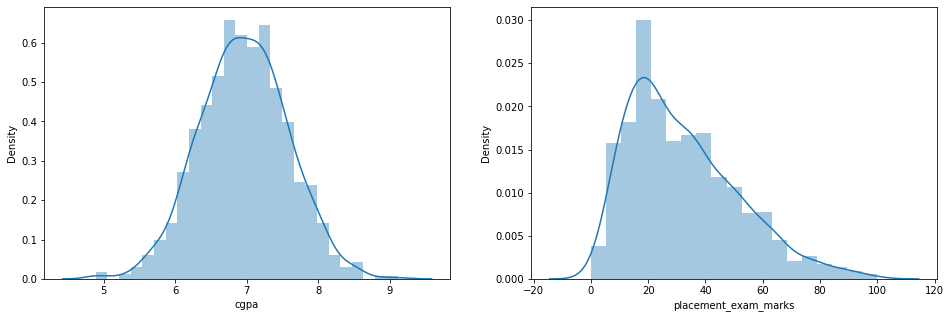

In [6]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [8]:

# Data in cgpa is in linear form.

print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [9]:
# Find the boundary values 

print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [11]:
# Find the Outliers using lower and upper boundary 

df[(df['cgpa']> 8.80) | (df['cgpa'] <5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Method 1 for Removing Outliers for  Linear Data 

- By Lower and Upper Bound 

In [13]:
# Removing the outliers by reversing the Condition given above

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] >5.11)]
new_df.shape 

(995, 3)

In [14]:
df.shape 

(1000, 3)

### Method 2 for Removing Outliers for  Linear Data 

- By Calculating the Z-Score 

In [17]:
# Calculate the Z-Score for all the cgpa data and any values lying outside 
# (3,-3) will act as outliers.
# x- mean / std

df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [24]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3) ]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
# Remove the above fields from the table 

new_df= df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3) ]
new_df.shape


(995, 4)

### Method 1 - Replacing Outliers for Linear Data 

- By Lower and Upper bound  


In [30]:
# replace the value with upper or lower limit 
# using if else condition 

upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

df['cgpa'] = np. where(
            df['cgpa']>upper_limit,upper_limit,
    np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])

)



In [29]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [31]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

### Method 1 - Replace Outliers for Non-Linear Data 

- using IQR 



In [32]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

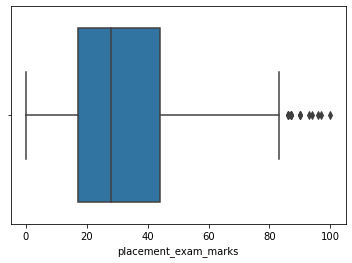

In [33]:
sns.boxplot(df['placement_exam_marks'])

In [38]:
### Finding the IOR 

percent25=df['placement_exam_marks'].quantile(0.25)
percent75=df['placement_exam_marks'].quantile(0.75)
IQR = percent75-percent25
IQR

27.0

In [42]:
Upper_bound=percent75 + 1.5 * IQR
lower_bound=percent25- 1.5 * IQR
print(Upper_bound,lower_bound)

84.5 -23.5


### Trimming or replacing the Outliers using IQR 

In [48]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np. where(
            new_df_cap['placement_exam_marks']>Upper_bound,Upper_bound,
    np.where(new_df_cap['placement_exam_marks']<lower_bound,lower_bound,
             new_df_cap['placement_exam_marks'])

)


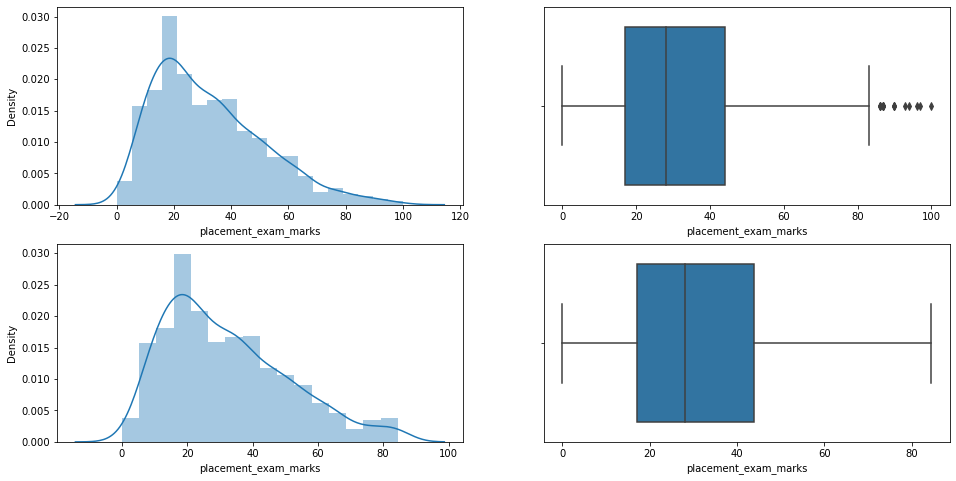

In [51]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()


### Method 3 - Winsorization Technique 

- We have to decide the upper and lower limit percentile randomly.



In [64]:
df_weight= pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day44-outlier-detection-using-percentiles\\weight-height.csv")
df_weight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [65]:
df_weight.shape 

(10000, 3)

In [66]:
df_weight['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

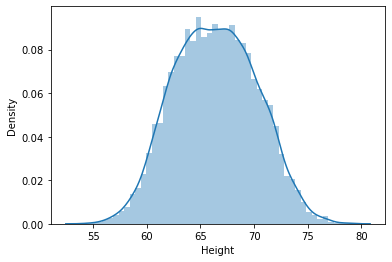

In [67]:
sns.distplot(df_weight['Height'])
plt.show()

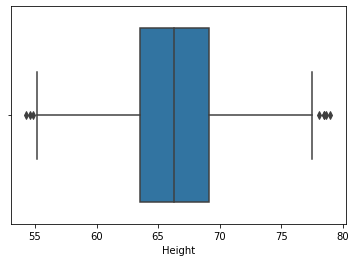

In [68]:
sns.boxplot(df_weight['Height'])
plt.show()

In [69]:
upper_limit= df_weight['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [70]:
lower_limit= df_weight['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [71]:

df_weight[(df_weight['Height'] >= 74.78) | (df_weight['Height'] <= 58.13)]
df_weight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [72]:
new_df_w=df_weight[(df_weight['Height'] <= 74.78) & (df_weight['Height'] >= 58.13)]
new_df_w

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [73]:
new_df_w['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [74]:
df_weight['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

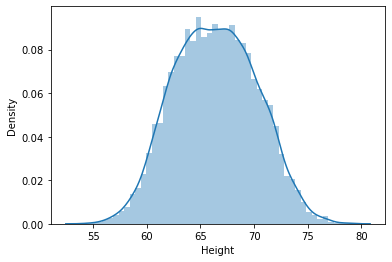

In [75]:
sns.distplot(df_weight['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

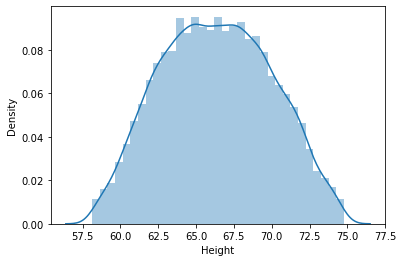

In [76]:
sns.distplot(new_df_w['Height'])

<AxesSubplot:xlabel='Height'>

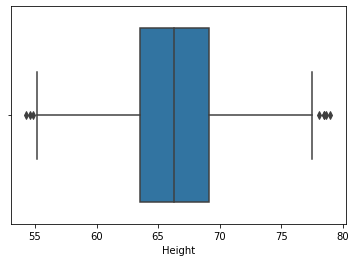

In [78]:
sns.boxplot(df_weight['Height'])

<AxesSubplot:xlabel='Height'>

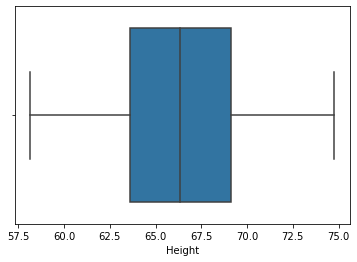

In [79]:
sns.boxplot(new_df_w['Height'])

### we can replace the values as well by the lower and upper limit 

### THE END 